<a href="https://colab.research.google.com/github/AichenYao/capstone-scripts/blob/main/Penguins_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=006A80>Penguins Detector - YOLOv5</font>
#### <font color=006A80>*By Dr. Lihi Gur Arie*</font>
***

## <font color=2892A8>Installation</font>  

<font color=003762>
Place this notebook under the desired directory, choose PyTorch version that matchs your hardware from 
https://pytorch.org/ and install:

In [ ]:
# !conda install pytorch torchvision cudatoolkit=11.3 -c pytorch
import torch
!cat /content/drive/MyDrive/drinking-waste-classification.yaml
print ('---------------------------------------------')

train: ../datasets/drinking-waste-classification/images/train
val: ../datasets/drinking-waste-classification/images/valid
test: ../datasets/drinking-waste-classification/images/test

nc: 4
names: ['AluCan','Glass','PET','HDPEM']
---------------------------------------------


<font color=003762>Clone yolov5 repository from ultralytics:

In [ ]:
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15305, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15305 (delta 0), reused 1 (delta 0), pack-reused 15300
Receiving objects: 100% (15305/15305), 14.13 MiB | 30.72 MiB/s, done.
Resolving deltas: 100% (10497/10497), done.
/content/yolov5/yolov5


<font color=003762>Install requirements:

In [ ]:
%pip install -qr requirements.txt  

<font color=003762>Import libraries:

In [ ]:
%cd yolov5
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import shutil

%matplotlib inline
display = utils.notebook_init()
!pwd


YOLOv5 🚀 v7.0-119-g5543b89 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/186.0 GB disk)
/content/yolov5/yolov5


## <font color=2892A8>Data handeling</font>

<font color=003762>
1. Provide your dataset:

The following function will generate the data directories splited into train, val, test.

In [ ]:
# from google.colab import drive # Link your drive if you are a colab user
# drive.mount('/content/drive')


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle==1.5.8
!mkdir /root/.kaggle

with open("/root/.kaggle/kaggle.json", "w+") as f:
    f.write('{"username":"tinghuahsu","key":"1b7b00493aad3a022373b2f30e08862f"}') 
    # Put your kaggle username & key here

!chmod 600 /root/.kaggle/kaggle.json

# !kaggle competitions download -c 11-785-f22-hw2p2-classification
# !unzip -qo '11-785-f22-hw2p2-classification.zip' -d '/content/data'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.8-py3-none-any.whl size=73255 sha256=838016a4237344387aa0aed1615cd230e6d17dc95b3070c149667c084c58cee0
  Stored in directory: /root/.cache/pip/wheels/f3/67/7b/a6d668747974998471d29b230e7221dd01330ac34faebe4af4
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
def create_data_directories(data_name):
    Path(f"../yolov5/datasets/{data_name}/images/Train").mkdir(parents=True, exist_ok=True)
    Path(f"../yolov5/datasets/{data_name}/images/val").mkdir(parents=True, exist_ok=True)
    Path(f"../yolov5/datasets/{data_name}/images/test").mkdir(parents=True, exist_ok=True)
    Path(f"../yolov5/datasets/{data_name}/labels/Train").mkdir(parents=True, exist_ok=True)
    Path(f"../yolov5/datasets/{data_name}/labels/valid").mkdir(parents=True, exist_ok=True)
    Path(f"../yolov5/datasets/{data_name}/labels/test").mkdir(parents=True, exist_ok=True)

    # Path(f"../yolov5/datasets/{data_name}/images").mkdir(parents=True, exist_ok=True)
    # Path(f"../yolov5/datasets/{data_name}/labels").mkdir(parents=True, exist_ok=True)

# create_data_directories('drinking-waste-classification')

<font color=003762>Place your data in the correct folders.

<font color=003762>
    2. Write 'data.yaml' file that suits your data: Make sure the paths to the data are correct. 
Make sure that the number of classes (nc) and the names of the classes match your data.
    

This is the content of my penguins_data.yaml file:

In [ ]:
# !cat /content/drive/Shareddrives/Capstone/drinking-waste-classification/drinking-waste-classification.yaml
!cat /content/drive/MyDrive/drinking-waste-classification.yaml
print ('---------------------------------------------')

# shutil.copytree('/content/drive/MyDrive/drinking-waste-classification/images', 
#             '/content/yolov5/datasets/drinking-waste-classification/images', dirs_exist_ok=True)
# shutil.copytree('/content/drive/MyDrive/drinking-waste-classification/labels', 
#             '/content/yolov5/datasets/drinking-waste-classification/labels', dirs_exist_ok=True)

train: ../datasets/drinking-waste-classification/images/train
val: ../datasets/drinking-waste-classification/images/valid
test: ../datasets/drinking-waste-classification/images/test

nc: 4
names: ['AluCan','Glass','PET','HDPEM']
---------------------------------------------


## <font color=2892A8>Training</font>

### <font color=003762>Feature extraction

In [ ]:
!python train.py --batch 32 --epochs 1 --data '/content/drive/MyDrive/drinking-waste-classification.yaml' --weights 'yolov5s6.pt'  --cache --freeze 12
# --project 'runs_bottles' --name 'feature_extraction'
# clear_output()

train: weights=yolov5s6.pt, cfg=, data=/content/drive/MyDrive/drinking-waste-classification.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_

In [ ]:
display.Image(f"runs/feature_extraction/results.png")

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

### <font color=003762>Fine Tuning

In [ ]:
# !python train.py --hyp 'hyp.finetune.yaml' --batch 16 --epochs 100 --data 'data/penguins_data.yaml' --weights 'runs_penguins/feature_extraction/weights/best.pt' --project 'runs_penguins' --name 'fine-tuning' --cache
# clear_output()

In [ ]:
# display.Image(f"runs_penguins/fine-tuning/results.png")

## <font color=2892A8>Validation</font>

In [ ]:
# !python val.py --weights 'runs_penguins/fine-tuning/weights/best.pt' --batch 64 --data 'data/penguins_data.yaml' --task test --project 'runs_penguins' --name 'validation_on_test_data' --augment
# clear_output()

<font color=003762>Plot Precision Recall curve:

FileNotFoundError: ignored

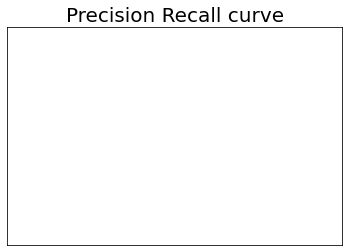

In [ ]:
plt.plot(figsize=(20,20))
plt.title('Precision Recall curve', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('runs_penguins/validation_on_test_data/PR_curve.png'))


## <font color=2892A8>Inference</font>

In [ ]:
# !python detect.py --weights 'runs_penguins/fine-tuning/weights/best.pt'  --conf 0.6 --source '../datasets/Penguins_data/images/test' --project 'runs_penguins' --name 'detect_test' --augment --line=3
# clear_output()

<font color=003762>View inference results:

In [ ]:
detect_path = r'runs_penguins/detect_test'

images = []
for img_path in glob.glob(detect_path + '/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,25))
columns = 4
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)

## <font color=2892A8>Converting model to ONNX & TensorRT</font>
<font color=003762>(Requires GPU)

<font color=003762>1. Install TensorRT

In [ ]:
# TensorRT 
# https://docs.nvidia.com/deeplearning/tensorrt/install-guide/index.html#installing-pip
!pip install -U nvidia-tensorrt --index-url https://pypi.ngc.nvidia.com  # install
clear_output()

<font color=003762>2. Export weights to ONNX format and to TensotRT engine

In [ ]:
!python export.py --weights 'runs_penguins/fine-tuning/weights/best.pt' --include engine onnx --data 'data/penguins_data.yaml' --device 0 --imgsz 640 640
clear_output()